<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_cluster_data(y_hat)_add_delta_(0)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_0'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_0_n20.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,98.328430,27.452828,44.862950,-1.230360,179.413847,180.431814,-1.017966
1,0.0,1.0,75.643252,30.785884,75.232337,0.098880,191.760353,191.573811,0.186542
2,0.0,2.0,89.052622,66.096637,74.705056,-0.974384,238.879931,239.465381,-0.585450
3,0.0,3.0,47.644629,56.391165,78.416916,-0.388558,192.064152,192.373377,-0.309224
4,0.0,4.0,77.730555,44.872873,33.884470,-0.427953,166.059945,166.286157,-0.226211
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,79.205923,54.773130,88.973740,-1.191668,231.761126,232.786825,-1.025699
19996,999.0,16.0,90.474790,24.527720,42.131852,2.146406,169.280768,167.412745,1.868023
19997,999.0,17.0,65.837729,50.389950,77.661620,-0.409694,203.479605,203.987716,-0.508111
19998,999.0,18.0,23.949956,93.827813,30.584189,0.046396,158.408354,159.040560,-0.632206


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    98.328430  27.452828  44.862950 -1.230360  179.413847   
      1.0    75.643252  30.785884  75.232337  0.098880  191.760353   
      2.0    89.052622  66.096637  74.705056 -0.974384  238.879931   
      3.0    47.644629  56.391165  78.416916 -0.388558  192.064152   
      4.0    77.730555  44.872873  33.884470 -0.427953  166.059945   
...                ...        ...        ...       ...         ...   
999.0 15.0   79.205923  54.773130  88.973740 -1.191668  231.761126   
      16.0   90.474790  24.527720  42.131852  2.146406  169.280768   
      17.0   65.837729  50.389950  77.661620 -0.409694  203.479605   
      18.0   23.949956  93.827813  30.584189  0.046396  158.408354   
      19.0   22.218238  98.078806  50.979309  1.454441  182.730794   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    180.431814 -1.017966  
      1.0    191.573811  0.186542  
      2.0    239.465381 -0.585450  
      3.0    192.373377 -0.309224  
      4.0    166.286157 -0.226211  
...                 ...       ...  
999.0 15.0   232.786825 -1.025699  
      16.0   167.412745  1.868023  
      17.0   203.987716 -0.508111  
      18.0   159.040560 -0.632206  
      19.0   181.780649  0.950145  

[20000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    98.328430  27.452828  44.862950 -1.230360  179.413847   
      1.0    75.643252  30.785884  75.232337  0.098880  191.760353   
      2.0    89.052622  66.096637  74.705056 -0.974384  238.879931   
      3.0    47.644629  56.391165  78.416916 -0.388558  192.064152   
      4.0    77.730555  44.872873  33.884470 -0.427953  166.059945   
...                ...        ...        ...       ...         ...   
999.0 15.0   79.205923  54.773130  88.973740 -1.191668  231.761126   
      16.0   90.474790  24.527720  42.131852  2.146406  169.280768   
      17.0   65.837729  50.389950  77.661620 -0.409694  203.479605   
      18.0   23.949956  93.827813  30.584189  0.046396  158.408354   
      19.0   22.218238  98.078806  50.979309  1.454441  182.730794   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    180.431814 -1.017966  
      1.0    191.573811  0.186542  
      2.0    239.465381 -0.585450  
      3.0    192.373377 -0.309224  
      4.0    166.286157 -0.226211  
...                 ...       ...  
999.0 15.0   232.786825 -1.025699  
      16.0   167.412745  1.868023  
      17.0   203.987716 -0.508111  
      18.0   159.040560 -0.632206  
      19.0   181.780649  0.950145  

[20000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,98.328430,27.452828,44.862950,-1.230360,179.413847,180.431814,-1.017966
1,0.0,1.0,75.643252,30.785884,75.232337,0.098880,191.760353,191.573811,0.186542
2,0.0,2.0,89.052622,66.096637,74.705056,-0.974384,238.879931,239.465381,-0.585450
3,0.0,3.0,47.644629,56.391165,78.416916,-0.388558,192.064152,192.373377,-0.309224
4,0.0,4.0,77.730555,44.872873,33.884470,-0.427953,166.059945,166.286157,-0.226211
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,79.205923,54.773130,88.973740,-1.191668,231.761126,232.786825,-1.025699
19996,999.0,16.0,90.474790,24.527720,42.131852,2.146406,169.280768,167.412745,1.868023
19997,999.0,17.0,65.837729,50.389950,77.661620,-0.409694,203.479605,203.987716,-0.508111
19998,999.0,18.0,23.949956,93.827813,30.584189,0.046396,158.408354,159.040560,-0.632206


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    98.328430  27.452828  44.862950 -1.230360  179.413847   
      1.0    75.643252  30.785884  75.232337  0.098880  191.760353   
      2.0    89.052622  66.096637  74.705056 -0.974384  238.879931   
      3.0    47.644629  56.391165  78.416916 -0.388558  192.064152   
      4.0    77.730555  44.872873  33.884470 -0.427953  166.059945   
...                ...        ...        ...       ...         ...   
999.0 15.0   79.205923  54.773130  88.973740 -1.191668  231.761126   
      16.0   90.474790  24.527720  42.131852  2.146406  169.280768   
      17.0   65.837729  50.389950  77.661620 -0.409694  203.479605   
      18.0   23.949956  93.827813  30.584189  0.046396  158.408354   
      19.0   22.218238  98.078806  50.979309  1.454441  182.730794   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    180.431814 -1.017966  
      1.0    191.573811  0.186542  
      2.0    239.465381 -0.585450  
      3.0    192.373377 -0.309224  
      4.0    166.286157 -0.226211  
...                 ...       ...  
999.0 15.0   232.786825 -1.025699  
      16.0   167.412745  1.868023  
      17.0   203.987716 -0.508111  
      18.0   159.040560 -0.632206  
      19.0   181.780649  0.950145  

[20000 rows x 7 columns]

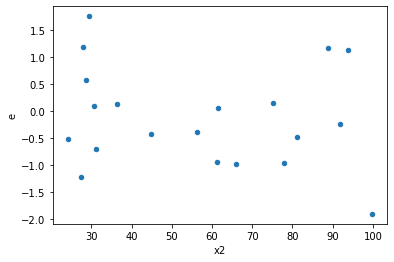

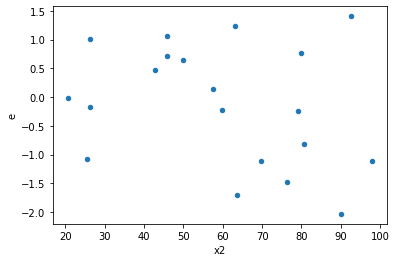

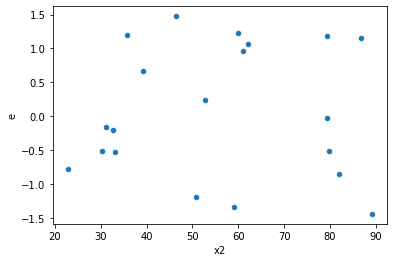

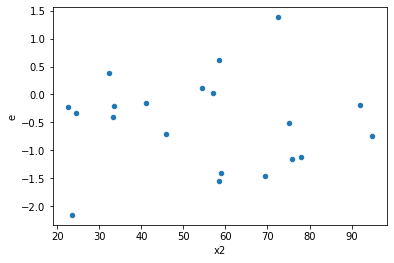

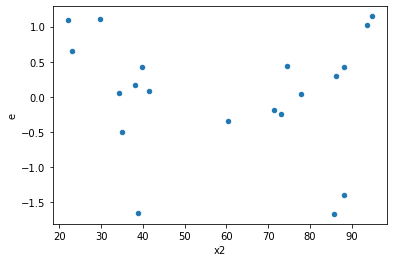

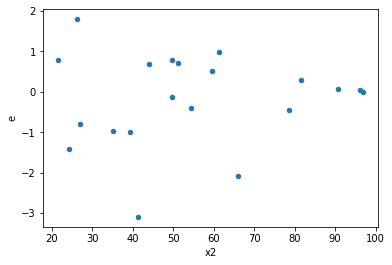

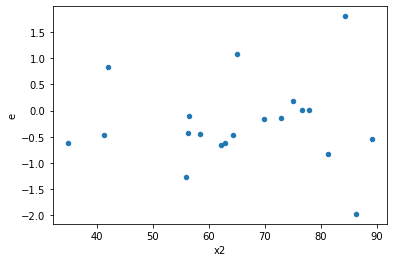

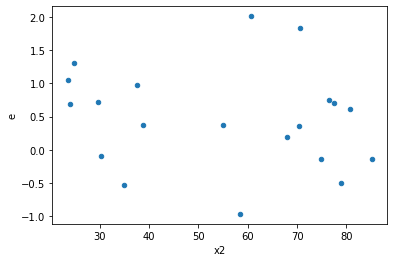

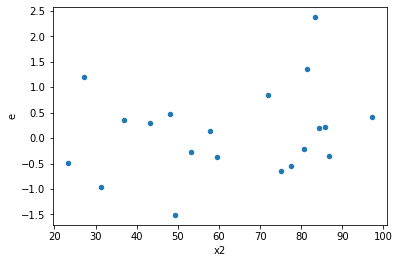

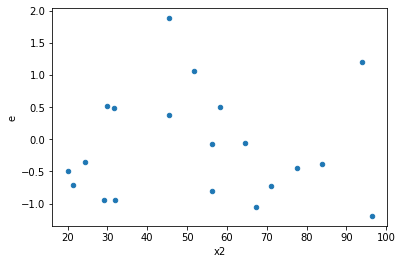

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,5.0,9.0,1.8293170619498882,10.35720429048854,0.36586341238997766,1.1508004767209488,3.1454374439997252,0.12922820019529802,0.935385899902351,0.06461410009764901,Reject001=1 : Homoscedasticity
1.0,10.0,4.0,9.003076624736657,4.901516531741702,0.9003076624736657,1.2253791329354256,1.3610670929630884,0.8221680399966083,0.5889159800016959,0.41108401999830413,Reject001=1 : Homoscedasticity
5.0,4.0,10.0,1.5127884858464908,17.344040085980104,0.3781971214616227,1.7344040085980104,4.585978872327319,0.0463107594423704,0.9768446202788148,0.0231553797211852,Reject001=1 : Homoscedasticity
7.0,6.0,8.0,0.09185381985032963,6.976291534692439,0.015308969975054938,0.8720364418365548,56.96245033189605,7.91213536022184e-06,0.9999960439323199,3.95606768011092e-06,Reject001=0 : Heteroscedasticity
15.0,7.0,7.0,7.375708172645201,8.77797649669212,1.0536725960921716,1.2539966423845885,1.190119821883356,0.8242630474436514,0.5878684762781743,0.4121315237218257,Reject001=1 : Homoscedasticity
20.0,7.0,7.0,3.6487474597840914,4.384219758245195,0.5212496371120131,0.6263171083207422,1.2015684304182082,0.8147801552495644,0.5926099223752178,0.4073900776247822,Reject001=1 : Homoscedasticity
23.0,2.0,12.0,0.0110390795315382,9.451615299066935,0.0055195397657691,0.787634608255578,142.6993266975454,8.63144467011523e-09,0.9999999956842777,4.315722335057615e-09,Reject001=0 : Heteroscedasticity
26.0,10.0,4.0,12.16672501859132,6.176753550688474,1.216672501859132,1.5441883876721185,1.2691898479767785,0.8826255953782138,0.5586872023108931,0.4413127976891069,Reject001=1 : Homoscedasticity
27.0,6.0,8.0,3.875231834459039,7.254342596408078,0.6458719724098398,0.9067928245510097,1.4039823111810181,0.6397526019724169,0.6801236990137915,0.31987630098620845,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,5.0,9.0,1.8293170619498882,10.35720429048854,0.36586341238997766,1.1508004767209488,3.1454374439997252,0.12922820019529802,Reject001=1 : Homoscedasticity
1.0,10.0,4.0,9.003076624736657,4.901516531741702,0.9003076624736657,1.2253791329354256,1.3610670929630884,0.8221680399966083,Reject001=1 : Homoscedasticity
2.0,6.0,8.0,4.389981361196967,3.411181969081298,0.7316635601994945,0.42639774613516224,0.5827784371534113,0.5268146262264389,Reject001=1 : Homoscedasticity
3.0,7.0,7.0,7.592798793721796,2.6278709182092723,1.0846855419602566,0.3754101311727532,0.3461004287881514,0.18492388820027547,Reject001=1 : Homoscedasticity
4.0,4.0,10.0,3.471342149728456,2.819925383789054,0.867835537432114,0.28199253837890537,0.32493776322332746,0.2899835061354829,Reject001=1 : Homoscedasticity
5.0,4.0,10.0,1.5127884858464908,17.344040085980104,0.3781971214616227,1.7344040085980104,4.585978872327319,0.0463107594423704,Reject001=1 : Homoscedasticity
6.0,10.0,4.0,7.352309514555349,1.3012665116231132,0.735230951455535,0.3253166279057783,0.4424686246705879,0.2696594613341273,Reject001=1 : Homoscedasticity
7.0,6.0,8.0,0.09185381985032963,6.976291534692439,0.015308969975054938,0.8720364418365548,56.96245033189605,7.91213536022184e-06,Reject001=0 : Heteroscedasticity
8.0,10.0,4.0,6.464352162960465,0.6634810278841016,0.6464352162960465,0.1658702569710254,0.25659223506019846,0.07375610751207544,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      879
Reject001=0 : Heteroscedasticity    121
Name: Result_test, dtype: int64